## Assignment 6


In [309]:
import matplotlib.pyplot as plt
import numpy as np
import mesa_reader as mr
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd

plt.style.use('dark_background')
plotpdf = PdfPages("Profiles.pdf")



In [291]:
class Mesa6:
    def __init__(self, mass, profiles=None, history=None):
        self.mass = mass
        self.profiles = []
        if profiles:
            for p in profiles:
                self.profiles.append(mr.MesaData(p))

In [303]:
# MesaData object
h = mr.MesaData('./mesa_assgn6/LOGS/history.data')
p = mr.MesaData('./mesa_assgn6/LOGS/profile1.data')

# Extract data for plotting
log_Teff = h.log_Teff               # Logarithm of the effective temperature
log_L = h.log_L                     # Logarithm of the luminosity
star_age = h.star_age               # Age of the star in years
star_mass = h.star_mass             # Mass of the star in solar masses
log_R = h.log_R                     # Logarithm of the stellar radius in solar units

In [305]:
# Load history.data file into a pandas DataFrame
history = pd.read_csv('./mesa_assgn6/LOGS/history.data', delim_whitespace=True, skiprows=5)

# Inspect the columns in history.data
#print(history.columns)


zams_idx = history[history['center_h1'] < 0.99].index[0]
zams_age = history.loc[zams_idx, 'star_age']
print(f"ZAMS identified at star_age = {zams_age}")

he_burning_idx = history[(history['center_h1'] < 1e-5) & (history['center_he4'] < history['center_he4'].max())].index[0]
he_burning_age = history.loc[he_burning_idx, 'star_age']
print(f"He-burning onset identified at star_age = {he_burning_age}")

ZAMS identified at star_age = 1e-05
He-burning onset identified at star_age = 55104130.07883154


In [319]:
zams = Mesa6(6, profiles=["./mesa_assgn6/LOGS/profile1.data"], history=["./mesa_assgn6/LOGS/history.data"])
hb = Mesa6(6, profiles=["./mesa_assgn6/LOGS/profile66.data"], history=["./mesa_assgn6/LOGS/history.data"])

# columns in MesaData
zams.profiles[0].logR
hb.profiles[0].logR

scaled_zams = zams.profiles[0].logR - zams.profiles[0].logR[0]
scaled_hb = hb.profiles[0].logR - hb.profiles[0].logR[0]

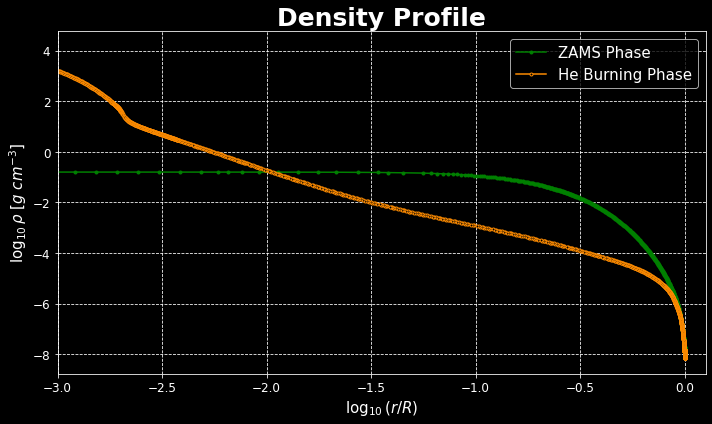

In [311]:
#Question 1a

plt.figure(figsize=(10, 6))

# ZAMS profile
plt.plot(scaled_zams, zams.profiles[0].logRho, label='ZAMS Phase', color='green', marker='.')

# Helium burning profile
plt.plot(scaled_hb, hb.profiles[0].logRho, label='He Burning Phase', color='darkorange', marker='.', markerfacecolor='black')

plt.xlabel(r'$\log_{10}(r/R)$',fontsize=15)
plt.ylabel(r'$\log_{10}\rho\ [g\ cm^{-3}]$', fontsize=15)
plt.title('Density Profile', fontsize=25, fontweight='bold')

plt.grid(True, linestyle='--')

plt.yscale('linear')
plt.xlim(-3, 0.1)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=15, frameon=True)

plt.tight_layout()
plotpdf.savefig()

plt.show()

#### The plot for Question 1a shows the star's density profiles during the ZAMS and Helium Burning phases. In the ZAMS phase, the core exhibits high density, which drops steeply toward the surface. As the star enters the Helium Burning phase, core density decreases considerably, reflecting the internal changes as fusion transitions from hydrogen to helium. The outer layers, however, retain similar densities in both evolutionary stages, indicating that the outer structure remains largely unaffected by the core processes.

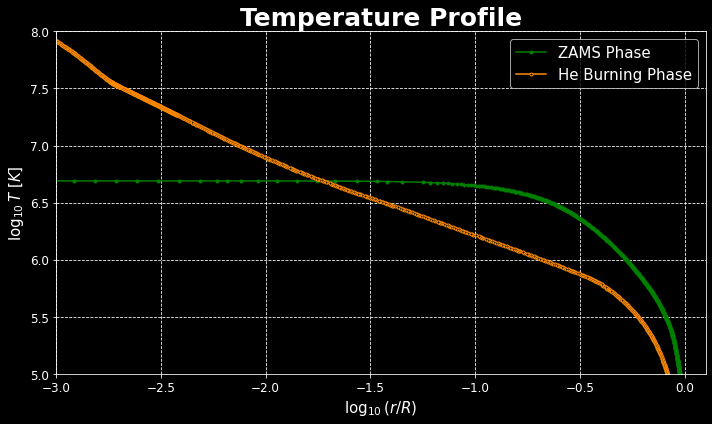

In [312]:
# Question 1b

plt.figure(figsize=(10, 6))

# ZAMS profile
plt.plot(scaled_zams, zams.profiles[0].logT, label='ZAMS Phase', color='green', marker='.')

# Helium burning profile
plt.plot(scaled_hb, hb.profiles[0].logT, label='He Burning Phase', color='darkorange', marker='.', markerfacecolor='black')

plt.xlabel(r'$\log_{10}(r/R)$', fontsize=15)
plt.ylabel(r'$\log_{10}T\ [K]$', fontsize=15)
plt.title('Temperature Profile', fontsize=25, fontweight='bold')

plt.grid(True, linestyle='--')
plt.xlim(-3, 0.1)  
plt.ylim(5, 8)   

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=15, frameon=True)

plt.tight_layout()
plotpdf.savefig()
plt.show()

#### The plots in Question 1b gives the temperature profile to illustrate the stellar evolution. During the ZAMS phase, hydrogen fusion in the core sustains a stable, high temperature throughout the star's interior, balancing the forces of gravitational collapse and nuclear fusion.  In the Helium Burning phase, after the hydrogen is depleted, the core contracts and heats up significantly as helium fusion begins. This process occurs in a denser, hotter core. However, since helium fusion is less efficient than hydrogen fusion, the outer layers cool slightly, and the temperature drops considerably in these regions as the star expands and redistributes energy to accommodate the burning of heavier elements.

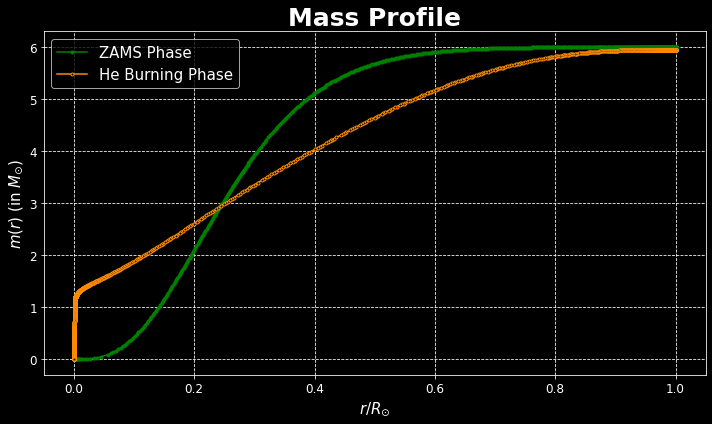

In [313]:
# Question 1c

plt.figure(figsize=(10, 6))

# ZAMS profile
plt.plot(10**scaled_zams, zams.profiles[0].mass, label='ZAMS Phase', color='green', marker='.')

# Helium burning profile
plt.plot(10**scaled_hb, hb.profiles[0].mass, label='He Burning Phase', color='darkorange', marker='.', markerfacecolor='black')

plt.xlabel(r'$r/R_{\odot}$', fontsize=15)
plt.ylabel(r'$m(r)$ (in $M_{\odot}$)', fontsize=15)
plt.title('Mass Profile', fontsize=25, fontweight='bold')

plt.grid(True, linestyle='--')

plt.yscale('linear')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend( fontsize=15, frameon=True)

plt.tight_layout()
plotpdf.savefig()
plt.show()

#### In the plots for Question 1c, we see that during the ZAMS phase, the star is stable and fusing hydrogen in its core, with mass steadily increasing from the center to the surface. The core is compact, with most of the mass concentrated near the center. As the star enters the Helium Burning phase, the core contracts and becomes denser, while the outer layers expand. Mass in the core grows rapidly, reflecting the increased density and concentration. In contrast, the mass distribution in the outer layers flattens as they expand and contribute less to the star's overall mass. This highlights the shift in mass concentration towards the core as the star evolves, while the outer regions play a diminishing role.

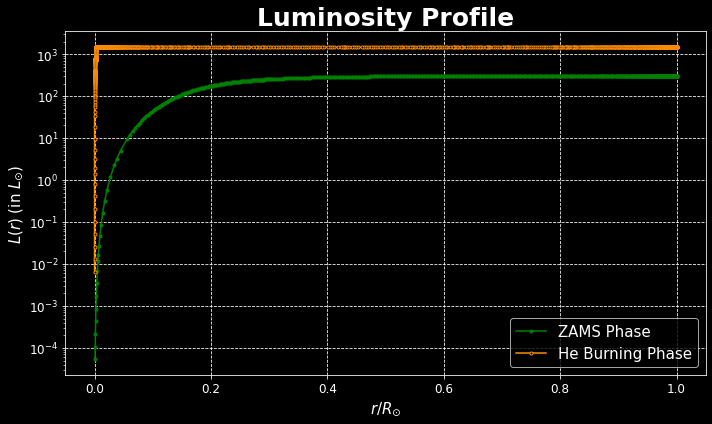

In [314]:
# Question 1d

plt.figure(figsize=(10,6))

# ZAMS profile for luminosity
plt.plot(10**scaled_zams, zams.profiles[0].luminosity, label='ZAMS Phase', color='green', marker='.')

# Helium burning profile for luminosity
plt.plot(10**scaled_hb, hb.profiles[0].luminosity, label='He Burning Phase', color='darkorange', marker='.', markerfacecolor='black')

# X-axis: r/R, Y-axis: Luminosity in solar units (L_sun)
plt.xlabel(r'$r/R_{\odot}$', fontsize=15)
plt.ylabel(r'$L(r)$ (in $L_{\odot}$)', fontsize=15)
plt.title('Luminosity Profile', fontsize=25, fontweight='bold')

plt.grid(True, linestyle='--')

plt.yscale('log')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend( fontsize=15, frameon=True)

plt.tight_layout()
plotpdf.savefig()
plt.show()

#### The plot of the logarithm of luminosity versus the normalized radial coordinate shows how the star's energy output varies with radius during different evolutionary phases. At the ZAMS stage, most of the luminosity is generated in the core, where hydrogen fusion occurs. The luminosity increases sharply near the center and gradually flattens as it approaches the outer layers, indicating that energy production is highly concentrated in the core. During the Helium Burning phase, the core is more compact and luminous, with a steeper rise in the luminosity profile near the center due to the intense helium fusion. In contrast, the outer layers contribute little to the overall luminosity, leading to a relatively flat profile as r/R approaches 1. This reflects the core’s dominance in energy production as the star evolves.

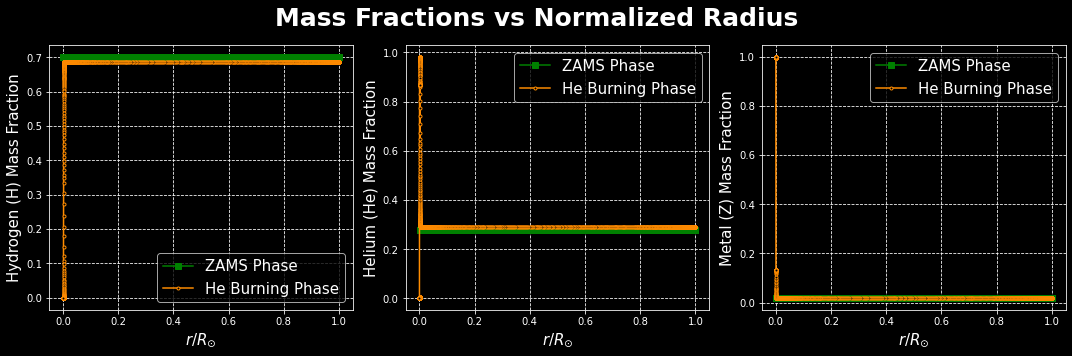

In [315]:
r_over_R_zams = 10**scaled_zams  # r/R values for ZAMS
x_mass_fraction_H_zams = zams.profiles[0].x_mass_fraction_H  # Hydrogen mass fraction (ZAMS)
y_mass_fraction_He_zams = zams.profiles[0].y_mass_fraction_He  # Helium mass fraction (ZAMS)
z_mass_fraction_metals_zams = zams.profiles[0].z_mass_fraction_metals  # Metal mass fraction (ZAMS)

r_over_R_hb = 10**scaled_hb  # r/R values for Helium burning
x_mass_fraction_H_hb = hb.profiles[0].x_mass_fraction_H  # Hydrogen mass fraction (HeB)
y_mass_fraction_He_hb = hb.profiles[0].y_mass_fraction_He  # Helium mass fraction (HeB)
z_mass_fraction_metals_hb = hb.profiles[0].z_mass_fraction_metals  # Metal mass fraction (HeB)


fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 3 subplots in 1 column

# Subplot 1: Hydrogen Mass Fraction
axs[0].plot(r_over_R_zams, x_mass_fraction_H_zams, label='ZAMS Phase', color='green', marker='s')
axs[0].plot(r_over_R_hb, x_mass_fraction_H_hb, label='He Burning Phase', color='darkorange', marker='.', markerfacecolor='black')
axs[0].set_xlabel(r'$r/R_{\odot}$', fontsize=15)
axs[0].set_ylabel('Hydrogen (H) Mass Fraction', fontsize=15)
axs[0].legend( fontsize=15)
axs[0].grid(True, linestyle='--')

# Subplot 2: Helium Mass Fraction
axs[1].plot(r_over_R_zams, y_mass_fraction_He_zams, label='ZAMS Phase', color='green', marker='s')
axs[1].plot(r_over_R_hb, y_mass_fraction_He_hb, label='He Burning Phase', color='darkorange', marker='.', markerfacecolor='black')
axs[1].set_xlabel(r'$r/R_{\odot}$', fontsize=15)
axs[1].set_ylabel('Helium (He) Mass Fraction', fontsize=15)
axs[1].legend(fontsize=15)
axs[1].grid(True, linestyle='--')

# Subplot 3: Metal Mass Fraction
axs[2].plot(r_over_R_zams, z_mass_fraction_metals_zams, label='ZAMS Phase', color='green', marker='s')
axs[2].plot(r_over_R_hb, z_mass_fraction_metals_hb,label='He Burning Phase', color='darkorange', marker='.', markerfacecolor='black')
axs[2].set_xlabel(r'$r/R_{\odot}$', fontsize=15)
axs[2].set_ylabel('Metal (Z) Mass Fraction', fontsize=15)
axs[2].legend(fontsize=15)
axs[2].grid(True, linestyle='--')

fig.suptitle('Mass Fractions vs Normalized Radius', fontsize=25, fontweight='bold')
plt.tight_layout()
plotpdf.savefig()

plt.show()

#### The mass fraction profiles for hydrogen, helium, and metals versus r/R show the changing composition of the star as it evolves. In the ZAMS phase, hydrogen dominates the core. Metals maintain a relatively constant distribution throughout, with slight increases in the core as nuclear fusion progresses. This illustrates the core's conversion of hydrogen into helium while outer regions retain their initial composition i.e. the sharp transitions in hydrogen and helium reflect the star's changing fusion processes as it evolves.

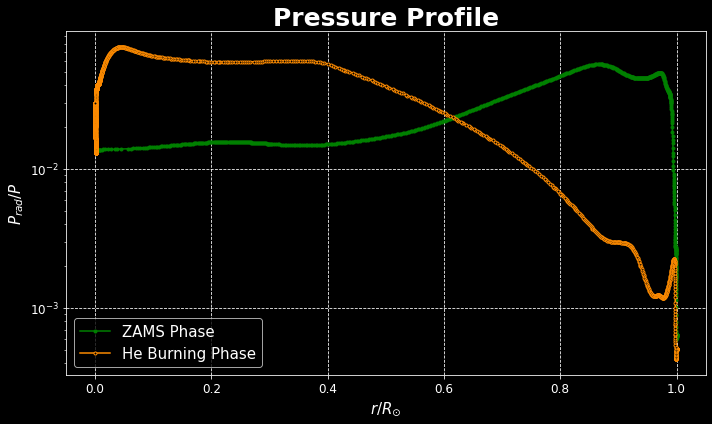

In [316]:
# Question 1f

plt.figure(figsize=(10, 6))

# ZAMS profile for pressure
plt.plot(10**scaled_zams, zams.profiles[0].prad/zams.profiles[0].pressure, label='ZAMS Phase', color='green', marker='.')

# Helium burning profile for pressure
plt.plot(10**scaled_hb, hb.profiles[0].prad/hb.profiles[0].pressure, label='He Burning Phase', color='darkorange', marker='.', markerfacecolor='black')

# X-axis: r/R, Y-axis: Rrad/P
plt.xlabel(r'$r/R_{\odot}$', fontsize=15)
plt.ylabel(r'$P_{rad}/P$', fontsize=15)
plt.title('Pressure Profile', fontsize=25, fontweight='bold')

plt.grid(True, linestyle='--')

plt.yscale('log')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=15, frameon=True)

plt.tight_layout()
plotpdf.savefig()
plt.show()

#### This profile reveals how pressure is distributed across the star. Near the core (r/R close to 0), radiation pressure dominates, so Prad/P approaches 1, and the log(Prad/P) value is higher. This is because the core is extremely hot, causing radiation pressure to significantly contribute to the total pressure. At ZAMS, radiation pressure dominates in the core, but its contribution first increases then decreases sharply moving outward, as gas pressure becomes more significant. In the Helium Burning phase, the core contracts, and radiation pressure becomes even more dominant in the center, while the outer layers, which have expanded, show a lower Prad/P ratio, with gas pressure continuing to dominate there. This reflects the increasing importance of radiation pressure in the core as the star evolves.

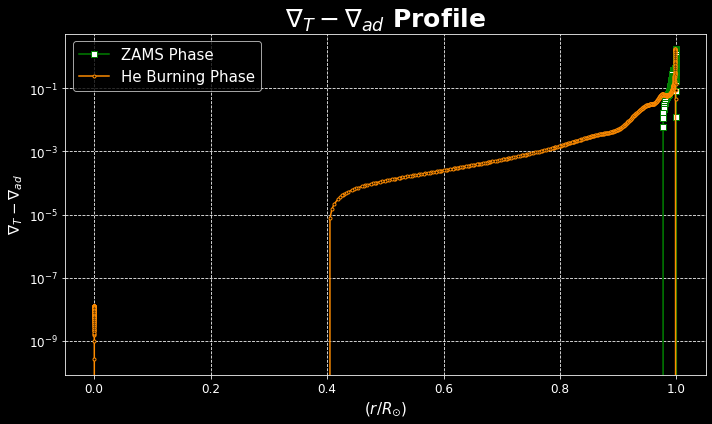

In [317]:
# Question 1g

plt.figure(figsize=(10, 6))

# ZAMS profile for gradT - grada
plt.plot(10**scaled_zams, zams.profiles[0].gradT_sub_grada, label='ZAMS Phase', 
         color='green', marker='s', markerfacecolor='white')

# Helium burning profile for gradT - grada
plt.plot(10**scaled_hb, hb.profiles[0].gradT_sub_grada, label='He Burning Phase', color='darkorange', marker='.', markerfacecolor='black')

# X-axis: r/R, Y-axis: gradT - grada
plt.xlabel(r'$(r/R_{\odot})$', fontsize=15)
plt.ylabel(r'$\nabla_{T} - \nabla_{ad}$', fontsize=15)


plt.title(r'$\nabla_T - \nabla_{ad}$ Profile', fontsize=25, fontweight='bold')


plt.grid(True, linestyle='--')


plt.yscale('log')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.legend(fontsize=15, frameon=True)

plt.tight_layout()
plotpdf.savefig()
plt.show()

#### In the ZAMS phase, the star's internal temperature gradient is relatively stable, with significant variations only near the surface due to the stable hydrogen burning. During the Helium Burning phase, the core's contraction and increased energy output lead to a slight increase in the gradient near the core. The more pronounced gradient increase from mid-radius outward is due to the expanded outer layers and changing energy transport mechanisms, as helium fusion shifts energy transport from the core to the outer regions.

In [318]:
plotpdf.close()